In [2]:
import pandas as pd
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from transformers import AdamW


In [2]:
! pip install transformers datasets

# 東北大学の日本語用BERT使用に必要なパッケージをインストール
! pip install fugashi ipadic

DEPRECATION: pytorch-lightning 1.6.1 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.6.1 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
!nvidia-smi

Sat Jan 13 13:10:22 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   42C    P8    21W / 350W |   9532MiB / 24234MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
df_train = pd.read_excel("../2_dialogueact_data_train.xlsx",engine = "openpyxl")
df_train

,発話者,応答者,対話行為,自己開示,質問(YesNo),質問(What),応答(YesNo),応答(平叙),あいづち,フィラー,確認,要求,共感
0,うん。かわいい、かわいい。,こ、これもいいでしょ。,自己開示,1,0,0,0,0,0,0,0,0,0
1,俺から言わせりゃ向こうが連絡しない。,忙しいのよ。今大学４年生なんだから。卒論だし。,自己開示,1,0,0,0,0,0,0,0,0,0
2,あんなの見せかけだもん。うちの一族俳優と女優で固めてあるもん。,そうなんだー。,あいづち,0,0,0,0,0,1,0,0,0,0
3,創作フランス料理はいいんだけどさ、お刺身に氷がつかってたり、ローストビーフに海老のソースをか...,どれがオードブルで、どれがメインで。,質問(What),0,0,1,0,0,0,0,0,0,0
4,あー、はいはい。,で買ったやつなの。で聞いてー、どうやってやんのって言ったら、ここにランプが、なんかここって言...,自己開示,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20876,ふーん、じゃ、学部が,うん、Ｍ。,応答(平叙),0,0,0,0,1,0,0,0,0,0
20877,こういう、和紙人形とかは絶対に機械でできないからさ。人の作業だもんね。手作業だもんね。,人形のケース、１つはあるけどね。こういうの。,自己開示,1,0,0,0,0,0,0,0,0,0
20878,だけど大変だった。ドマーニのさ、あれものっすごいあのガソリン食うのよね。,そうなの、わたし乗ったことないから。,自己開示,1,0,0,0,0,0,0,0,0,0
20879,すごくない？うん、なんか、落ちそうな生徒は先生の部屋に行って、紙をもらって、物を買ってくると...,なんかきっとおもしろくない先生なんだろうねー。こう、しゃれのつもりでやってみたんだけど、まだ...,自己開示,1,0,0,0,0,0,0,0,0,0


In [6]:

# value_counts = df_train['対話行為'].value_counts()
# value_counts

自己開示                   11321
質問(YesNo)               1909
応答(平叙)                  1722
あいづち                    1606
質問(What)                1114
確認                      1094
フィラー                     778
共感                       728
応答(YesNo)                355
要求                       176
*                         77
応答(YesNo)/質問(YesNo)        1
Name: 対話行為, dtype: int64

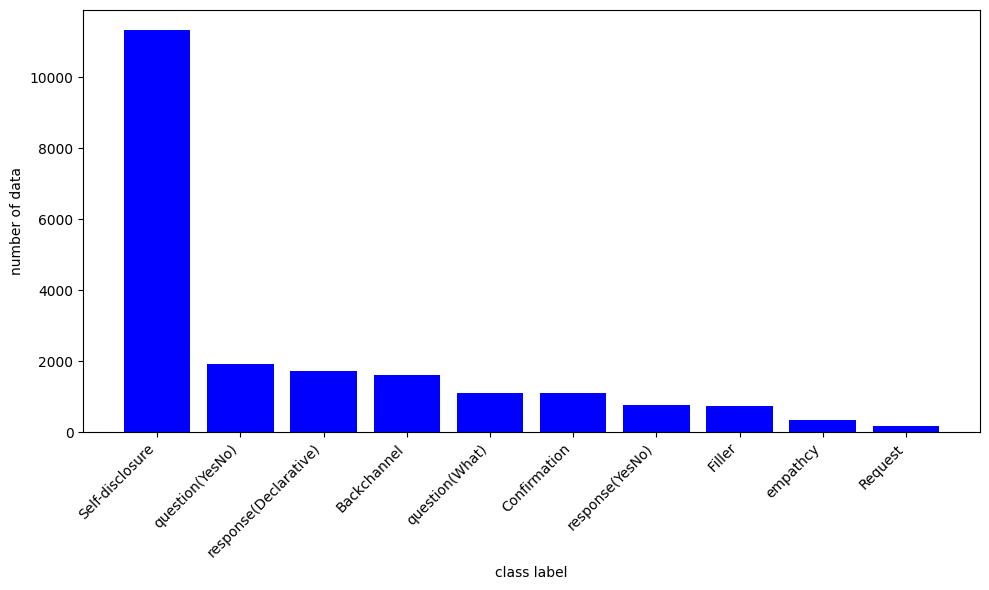

In [10]:
import matplotlib.pyplot as plt

# データを辞書として作成
data = {
    'カテゴリ': ['Self-disclosure', 'question(YesNo)', 'response(Declarative)', 'Backchannel','question(What)', 'Confirmation', 'response(YesNo)', 
                    ' Filler', "empathcy",'Request'],
    '数': [11321, 1909, 1722, 1606, 1114, 1094, 778, 728, 355, 176]
}

# データフレームを作成
df = pd.DataFrame(data)

# 棒グラフを描画
plt.figure(figsize=(10, 6))
plt.bar(df['カテゴリ'], df['数'], color='blue')
# plt.title('')
plt.xlabel('class label')
plt.ylabel('number of data')
plt.xticks(rotation=45, ha='right')  # カテゴリ名を45度傾けて表示
plt.tight_layout()
# plt.savefig('bar_10_taiwkoui.png')
# グラフを表示
plt.show()

In [5]:
df_val = pd.read_excel("../2_dialogueact_data_val.xlsx",engine = "openpyxl")
df_val

,発話者,応答者,対話行為,自己開示,質問(YesNo),質問(What),応答(YesNo),応答(平叙),あいづち,フィラー,確認,要求,共感
0,大葉とのり、すてき、組み合わせ。,すてきだね、私も好き。,自己開示,1,0,0,0,0,0,0,0,0,0
1,あー、そっかー。,でも向こうの方が車で通ってるから通勤時間は短いじゃん。で、同じぐらいに終わっても向こうの方が...,自己開示,1,0,0,0,0,0,0,0,0,0
2,うん、Ｚに、まで、じゃ、一番向こうっかたまで行ってみようかって、そいでそのときに、お、お金を...,なんだかおもしろい。え？あー、はい、わかった。,自己開示,1,0,0,0,0,0,0,0,0,0
3,その高校の校長先生、スペイン出身だけど、日本語ももちろんしゃべれるんだよね。,うん、話せるみたい。,応答(平叙),0,0,0,0,1,0,0,0,0,0
4,国際免許とったの、まーじでー。,乗る気満々。,応答(平叙),0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,今度４人で、会う時は映画見にいくんでしょうとか、言われたんだけど、知らないよ、そんな話あったっけ？,たぶん、だから、４人で再会するんだったら、映画がいいんじゃないっていう話をしてて。,応答(平叙),0,0,0,0,1,0,0,0,0,0
2606,台湾のご飯っておいしいしねー。,ねー、やっぱそれだよねー。うん。,共感,0,0,0,0,0,0,0,0,0,1
2607,まだあそこの映画館、営業してるよねー。,あ、そうなんだ。私１回も行ったことなくて。,自己開示,1,0,0,0,0,0,0,0,0,0
2608,でも、私、そのＦＴＰのやつ、見よっか？,うん？,あいづち,0,0,0,0,0,1,0,0,0,0


In [6]:
train_docs1 = df_train["発話者"]
train_docs2 = df_train["応答者"]

train_label1= df_train["自己開示"].tolist()
train_label2 = df_train["質問(YesNo)"].tolist()
train_label3 = df_train["質問(What)"].tolist()
train_label4 = df_train["応答(YesNo)"].tolist()
train_label5 = df_train["応答(平叙)"].tolist()
train_label6 = df_train["あいづち"].tolist()
train_label7 = df_train["フィラー"].tolist()
train_label8 = df_train["確認"].tolist()
train_label9 = df_train["要求"].tolist()
#print(len(train_docs1))

In [12]:
train_labels = df_train[['自己開示', '質問(YesNo)', '質問(What)', '応答(YesNo)', '応答(平叙)', 'あいづち', 'フィラー', '確認', '要求', '共感']].values.tolist()
len(train_labels)

20881

In [8]:
val_docs1 = df_val["発話者"]
val_docs2 = df_val["応答者"]

val_label1= df_val["自己開示"].tolist()
val_label2 = df_val["質問(YesNo)"].tolist()
val_label3 = df_val["質問(What)"].tolist()
val_label4 = df_val["応答(YesNo)"].tolist()
val_label5 = df_val["応答(平叙)"].tolist()
val_label6 = df_val["あいづち"].tolist()
val_label7 = df_val["フィラー"].tolist()
val_label8 = df_val["確認"].tolist()
val_label9 = df_val["要求"].tolist()
#print(len(val_docs1))

In [11]:
val_labels = df_val[['自己開示', '質問(YesNo)', '質問(What)', '応答(YesNo)', '応答(平叙)', 'あいづち', 'フィラー', '確認', '要求', '共感']].values.tolist()
len(val_labels)

2610

In [10]:
#自己開示,質問(YesNo),質問(What),応答(YesNo),応答(平叙),あいづち,フィラー,確認,要求

In [6]:
df_test = pd.read_excel("../2_dialogueact_data_test.xlsx",engine = "openpyxl")
df_test

,発話者,応答者,対話行為,自己開示,質問(YesNo),質問(What),応答(YesNo),応答(平叙),あいづち,フィラー,確認,要求,共感
0,食事中,食事中のこのぽつぽつという会話も録っといた方が,自己開示,1,0,0,0,0,0,0,0,0,0
1,ラフランスと生ハムが出てきたお店は、ちょっとフランス料理風のところらしいんだけど。でも、なん...,ちょっと、創作フランス料理なんや。,自己開示,1,0,0,0,0,0,0,0,0,0
2,まじで？女？男？管理人。,結構、オヤジなんだけどね。,応答(平叙),0,0,0,0,1,0,0,0,0,0
3,でもね、女の子が言うとね、ちょっと、ま、ちょっとマニアックな言い方だけど、ちょ、かわいいとき...,ええー？何か、男っぽすぎるっていうか。,自己開示,1,0,0,0,0,0,0,0,0,0
4,うん。それを思ったら、お母さんて偉いよね。,偉いよね。ほんと、から、ちょっと、何か、気持ち悪いけど、体から出てくるものが大きすぎるよね。,自己開示,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,だめなんだ。,うーん。まあ日本だって逆は、息子さんをくださいってことはないもんねえ。,確認,0,0,0,0,0,0,0,1,0,0
2607,でも先生も言ってたよ。最終的に筆力だって。なんかこう、いきなりがーっと長くなったり、一挙に短...,そうかあー。文章力ねえ。でも私、卒論のときなんてあとから見たら、わーすごい何書いてんだかみた...,質問(What),0,0,1,0,0,0,0,0,0,0
2608,何、何とか海道。,それ尾道の方から上ってる？,質問(YesNo),0,1,0,0,0,0,0,0,0,0
2609,えー、いいですね、ちょっと。,うん。ねえ。,フィラー,0,0,0,0,0,0,1,0,0,0


In [12]:
test_docs1 = df_test["発話者"]
test_docs2 = df_test["応答者"]

test_label1= df_test["自己開示"].tolist()
test_label2 = df_test["質問(YesNo)"].tolist()
test_label3 = df_test["質問(What)"].tolist()
test_label4 = df_test["応答(YesNo)"].tolist()
test_label5 = df_test["応答(平叙)"].tolist()
test_label6 = df_test["あいづち"].tolist()
test_label7 = df_test["フィラー"].tolist()
test_label8 = df_test["確認"].tolist()
test_label9 = df_test["要求"].tolist()
#print(len(train_docs1))

In [13]:
test_labels = df_test[['自己開示', '質問(YesNo)', '質問(What)', '応答(YesNo)', '応答(平叙)', 'あいづち', 'フィラー', '確認', '要求', '共感']].values.tolist()
len(test_labels)

2611

In [14]:
train = pd.DataFrame()
df_train["対話行為list"] = train_labels
train = pd.concat([df_train["発話者"].astype(str),df_train["応答者"].astype(str)], axis = 1)
train = pd.concat([train,df_train["対話行為list"]], axis = 1)
train["対話行為list"]

0        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
3        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
4        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                      ...              
20876    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
20877    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20878    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20879    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20880    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Name: 対話行為list, Length: 20881, dtype: object

In [15]:
val = pd.DataFrame()
df_val["対話行為list"] = val_labels
val = pd.concat([df_val["発話者"].astype(str), df_val["応答者"].astype(str)], axis = 1)
val = pd.concat([val, df_val["対話行為list"]], axis = 1)
val["対話行為list"]

0       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
4       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
                     ...              
2605    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
2606    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
2607    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2608    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
2609    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Name: 対話行為list, Length: 2610, dtype: object

In [16]:
test = pd.DataFrame()
df_test["対話行為list"] = test_labels
test = pd.concat([df_test["発話者"].astype(str), df_test["応答者"].astype(str)], axis = 1)
test = pd.concat([test, df_test["対話行為list"]], axis = 1)
test["対話行為list"]

0       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
3       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                     ...              
2606    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
2607    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
2608    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2609    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
2610    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Name: 対話行為list, Length: 2611, dtype: object

In [17]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [18]:
checkpoint = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [19]:
# 前処理関数: tokenize_function
import numpy as np
from datasets import Dataset
def tokenize_function(batch):
    tokenized_batch = tokenizer(batch['発話者'], batch['応答者'], truncation=True, padding='max_length')
    #tokenized_batch['labels'] = batch['対話行為list']
    tokenized_batch['labels'] = np.argmax(batch['対話行為list'], axis=-1)
    return tokenized_batch

# Transformers用のデータセット形式に変換
# pandas.DataFrame -> datasets.Dataset
target_columns = ['発話者', "応答者","対話行為list"]

train_dataset = Dataset.from_pandas(train[target_columns])
val_dataset = Dataset.from_pandas(val[target_columns])
test_dataset = Dataset.from_pandas(test[target_columns])
batch_size = 10
# 前処理（tokenize_function） を適用
train_tokenized_dataset = train_dataset.map(tokenize_function, batched=True)
val_tokenized_dataset = val_dataset.map(tokenize_function, batched=True)
test_tokenized_dataset = test_dataset.map(tokenize_function, batched=True)

#train_tokenized_dataset.set_format("torch")
#test_tokenized_dataset.set_format("torch")
#print(train_tokenized_dataset["labels"])

  0%|          | 0/21 [00:00<?, ?ba/s]

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [20]:

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=10)


Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialize

In [21]:
labe = pd.DataFrame(train_tokenized_dataset["labels"])
label_ratio =labe.value_counts(sort=False, normalize=True)
print(label_ratio)

0    0.545903
1    0.091423
2    0.053350
3    0.017001
4    0.082467
5    0.076912
6    0.037259
7    0.052392
8    0.008429
9    0.034864
dtype: float64


In [22]:
import torch
class_weight = torch.tensor(1/label_ratio).clone().to(device, torch.float32)
class_weight

tensor([  1.8318,  10.9382,  18.7442,  58.8197,  12.1260,  13.0019,  26.8393,
         19.0868, 118.6420,  28.6827], device='cuda:0')

In [23]:
#https://qiita.com/nipo/items/44ce3aaf6acd4e2649d1
#https://qiita.com/m__k/items/2c4e476d7ac81a3a44af
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from datasets import load_metric
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# 評価指標を定義
# https://huggingface.co/docs/transformers/training
#metric = load_metric("accuracy")

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     label_ids = np.argmax(labels, axis=-1)
#     return metric.compute(predictions=predictions, references=label_ids)

# 訓練時の設定
# https://huggingface.co/docs/transformers/v4.21.1/en/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(
    output_dir="weight_result_kyoukan",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3.0,
    learning_rate=2e-5,
    evaluation_strategy="steps",
    save_strategy="steps",
    #logging_strategy="steps"
    eval_steps=500,
    load_best_model_at_end=True
)  # 200ステップ毎にテストデータで評価する

# Trainerを生成


In [24]:
#https://dev.classmethod.jp/articles/huggingface-usage-custom-loss-func/

from torch import nn

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.CrossEntropyLoss(weight=class_weight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        #loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss
    
# class CustomTrainer(Trainer):
#     def compute_loss(self, model, inputs, return_outputs=False):
#         labels = inputs.get("labels").to("cpu")

#         # forward pass
#         outputs = model(**inputs)
#         logits = outputs.get("logits").to("cpu")

        
#         # compute custom loss (suppose one has 3 labels with different weights)
#         pos_weight = torch.tensor([28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454])
#         loss_fct = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
#         #loss_fct = nn.BCEWithLogitsLoss()
#         loss = loss_fct(logits, labels)
      
#         return (loss, outputs) if return_outputs else loss
    
    



In [25]:
trainer = CustomTrainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_tokenized_dataset,
    eval_dataset=val_tokenized_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_tokenized_dataset,
#     eval_dataset=val_tokenized_dataset,
#     compute_metrics=compute_metrics,
#     callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
# )


/usr/local/lib/python3.8/dist-packages/accelerate/utils/imports.py:197: UserWarning: Intel Extension for PyTorch 1.11 needs to work with PyTorch 1.11.*, but PyTorch 1.12.1+cu113 is found. Please switch to the matching version and run again.
  warnings.warn(


In [26]:
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_tokenized_dataset,
#     eval_dataset=val_tokenized_dataset,
#     compute_metrics=compute_metrics,
#     callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
# )


In [27]:
# 訓練を実行
trainer.train()


/usr/local/lib/python3.8/dist-packages/accelerate/utils/imports.py:197: UserWarning: Intel Extension for PyTorch 1.11 needs to work with PyTorch 1.11.*, but PyTorch 1.12.1+cu113 is found. Please switch to the matching version and run again.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
500,1.845500,1.400848,0.622605,0.421229,0.424148,0.483323
1000,1.340400,1.246265,0.570881,0.477536,0.462440,0.560498
1500,1.229800,1.284326,0.598851,0.473689,0.474266,0.556519
2000,1.176200,1.140557,0.668966,0.555737,0.550582,0.612765
2500,1.057000,1.118150,0.668199,0.541293,0.519470,0.624430
3000,0.932200,1.063518,0.648659,0.567813,0.534864,0.641666
3500,0.901000,1.103967,0.695785,0.588643,0.575568,0.636938
4000,0.887900,1.092577,0.672797,0.566891,0.537663,0.630239


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=4000, training_loss=1.1712560195922852, metrics={'train_runtime': 989.9015, 'train_samples_per_second': 63.282, 'train_steps_per_second': 7.913, 'total_flos': 8418316628047872.0, 'train_loss': 1.1712560195922852, 'epoch': 1.53})

In [28]:

trainer.evaluate()

{'eval_loss': 1.0635179281234741,
 'eval_accuracy': 0.6486590038314176,
 'eval_f1': 0.5678130479972187,
 'eval_precision': 0.5348643952235619,
 'eval_recall': 0.6416658447560837,
 'eval_runtime': 21.0545,
 'eval_samples_per_second': 123.964,
 'eval_steps_per_second': 15.531,
 'epoch': 1.53}

In [23]:
trainer.save_state()
trainer.save_model()

In [29]:
torch.save(model, 'dialogueact_class_weight_kyoukan.pth')

In [30]:
pred_result = trainer.predict(test_tokenized_dataset)
pred_result

PredictionOutput(predictions=array([[ 3.4604042 ,  0.53413355, -0.3959882 , ...,  1.1125307 ,
         0.14392059, -0.41615275],
       [ 2.6227355 ,  1.0473545 , -0.20428993, ...,  0.95821416,
        -1.6831961 ,  1.8596929 ],
       [ 1.9883375 , -1.1851453 , -1.2121696 , ...,  0.2732416 ,
        -0.5630293 , -1.2716107 ],
       ...,
       [-0.7620207 ,  5.2692704 ,  1.8902054 , ...,  2.3444912 ,
        -0.59800977, -1.0128185 ],
       [-0.563288  , -2.1046448 , -2.0943067 , ..., -1.6607032 ,
        -2.038027  ,  1.3583815 ],
       [ 0.63813144, -1.3676664 , -1.4800135 , ..., -1.3421042 ,
        -2.3201094 ,  1.5318048 ]], dtype=float32), label_ids=array([0, 0, 4, ..., 1, 6, 0]), metrics={'test_loss': 0.9957690834999084, 'test_accuracy': 0.658751436231329, 'test_f1': 0.5796721529069087, 'test_precision': 0.539206947882968, 'test_recall': 0.6757145944968592, 'test_runtime': 21.0895, 'test_samples_per_second': 123.806, 'test_steps_per_second': 15.505})

In [31]:
import numpy as np

y_preds = np.argmax(pred_result.predictions, axis=1)
y_pred_hozon = pd.DataFrame(y_preds, columns = ["y_pred"])
y_test = np.array(test_tokenized_dataset["labels"])
y_test_hozon = pd.DataFrame(y_test, columns = ["y_test"])

y_pred_hozon.to_csv('y_pred_hozon2.csv')
y_test_hozon.to_csv('y_test_hozon2.csv')

In [32]:
dialogue_labels = ['自己開示', '質問(YesNo)', '質問(What)', '応答(YesNo)', '応答(平叙)', 'あいづち', 'フィラー', '確認', '要求',"共感"]

In [33]:
def np_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

#def analyze_emotion(text, show_fig=False, ret_prob=False):
def analyze_emotion(text1, text2):
    # 推論モードを有効か
    model.eval()

    # 入力データ変換 + 推論
    tokens = tokenizer(text1, text2, truncation=True, return_tensors="pt")
    tokens.to(model.device)
    preds = model(**tokens)
    #print(preds)
    prob = np_softmax(preds.logits.cpu().detach().numpy()[0])
    out_dict = {n: p for n, p in zip(dialogue_labels, prob)}
    
    

    # 棒グラフを描画
    #if show_fig:
        #plt.figure(figsize=(8, 3))
        #df = pd.DataFrame(out_dict.items(), columns=['name', 'prob'])
        #sns.barplot(x='name', y='prob', data=df)
        #plt.title('入力文 : ' + text, fontsize=15)

    #if ret_prob:
        #return out_dict
    return out_dict

# 動作確認
analyze_emotion("そうなの！チラッと見たら全然移りが違うの。真剣な表情くっきり！","Aも買っちゃえば？高いかもしれないけど")

{'自己開示': 0.61384344,
 '質問(YesNo)': 0.0150091825,
 '質問(What)': 0.0062495926,
 '応答(YesNo)': 0.0030195417,
 '応答(平叙)': 0.2923636,
 'あいづち': 0.0050599575,
 'フィラー': 0.016880311,
 '確認': 0.025651598,
 '要求': 0.0053473846,
 '共感': 0.016575359}

<Figure size 640x480 with 0 Axes>

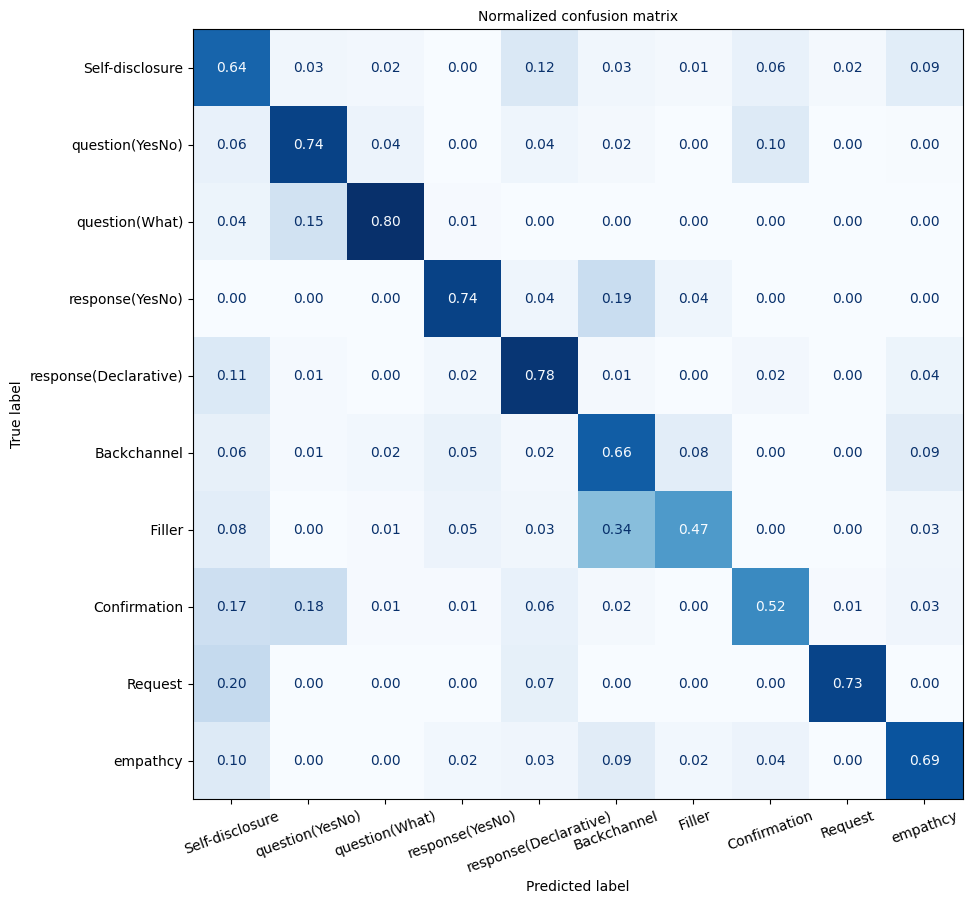

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig=plt.figure()

y_preds = np.argmax(pred_result.predictions, axis=1)
dk = pd.DataFrame(y_preds)
y_test = np.array(test_tokenized_dataset["labels"])
dk2 = pd.DataFrame(y_test)
labels = ['Self-disclosure', 'question(YesNo)', 'question(What)', 'response(YesNo)', 
                   'response(Declarative)', 'Backchannel', ' Filler', 'Confirmation', 'Request',"empathcy"]

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)

    plt.yticks(fontsize=10)
    
    plt.xticks(rotation=20, fontsize = 10)
    plt.title("Normalized confusion matrix", fontsize = 10)
    plt.show()
    fig.savefig(f"Normalized confusion matrix_weight.png")

plot_confusion_matrix(y_preds, y_test, labels)






In [77]:
#data = pd.concat([dk, dk2], axis = 1)
dk.columns = ['label']
dk2.columns = ['label']
print(len(dk[dk["label"] == 0]))
print(len(dk[dk["label"] == 1]))
print(len(dk[dk["label"] == 2]))
print(len(dk[dk["label"] == 3]))
print(len(dk[dk["label"] == 4]))
print(len(dk[dk["label"] == 5]))
print(len(dk[dk["label"] == 6]))
print(len(dk[dk["label"] == 7]))
print(len(dk[dk["label"] == 8]))

1236
248
121
87
302
437
60
64
29


In [40]:
#data.to_csv("kyoukanreituika.csv", index = False, encoding = "UTF-8")

In [78]:
print(len(dk2[dk2["label"] == 0]))
print(len(dk2[dk2["label"] == 1]))
print(len(dk2[dk2["label"] == 2]))
print(len(dk2[dk2["label"] == 3]))
print(len(dk2[dk2["label"] == 4]))
print(len(dk2[dk2["label"] == 5]))
print(len(dk2[dk2["label"] == 6]))
print(len(dk2[dk2["label"] == 7]))
print(len(dk2[dk2["label"] == 8]))

1187
192
130
97
344
390
95
128
21
